In [111]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

#### Task 1. Merge 12 months of data into single dataframe and csv file 

In [2]:
df = pd.DataFrame()

for file_name in os.listdir('./Sales_Data'):
    try:
        temp_df = pd.read_csv('./Sales_Data/' + file_name, encoding='utf-8')
    except UnicodeDecodeError:
        temp_df = pd.read_csv('./Sales_Data/' + file_name, encoding='latin1')
    
    df = pd.concat([temp_df, df], ignore_index=True)

df.head()
df.to_csv("all_data.csv", index=False)

Read all data

In [3]:
df = pd.read_csv('all_data.csv')

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",NaN
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",NaN
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",NaN
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",NaN
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",NaN


#### What was the best month for sales? How much was earned that month?

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [7]:
df = df[df['Order ID'] != 'Order ID']

In [8]:
df.dropna(inplace=True)

In [9]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6


In [10]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df['Price Each'] = df['Price Each'].astype('float32')

In [11]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [12]:
df['Sales'] = df['Sales'].round(2)

In [13]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,209921,USB-C Charging Cable,1,11.950000,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.000000,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.989990,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.990005,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.989998,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99


In [14]:
month_sales = df.groupby('Month')['Sales'].sum()
month_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

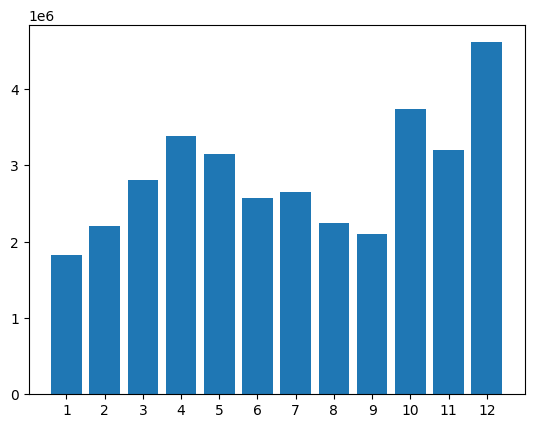

In [15]:
import matplotlib.pyplot as plt
month = range(1,13)

plt.bar(month, month_sales)
plt.xticks(month)
plt.show()

#### What US city had the highest number of sales

In [16]:
df['City'] = df['Purchase Address'].str.extract(r',\s([^,]+,\s[A-Z]{2})\s')

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,209921,USB-C Charging Cable,1,11.950000,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95,"Portland, ME"
1,209922,Macbook Pro Laptop,1,1700.000000,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00,"San Francisco, CA"
2,209923,ThinkPad Laptop,1,999.989990,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99,"Los Angeles, CA"
3,209924,27in FHD Monitor,1,149.990005,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99,"Seattle, WA"
4,209925,Bose SoundSport Headphones,1,99.989998,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99,"San Francisco, CA"


In [107]:
cities_sales = df.groupby('City')['Sales'].sum().reset_index()

In [108]:
cities_sales

,City,Sales
0,"Atlanta, GA",2795498.58
1,"Austin, TX",1819581.75
2,"Boston, MA",3661642.01
3,"Dallas, TX",2767975.40
4,"Los Angeles, CA",5452570.80
5,"New York City, NY",4664317.43
6,"Portland, ME",449758.27
7,"Portland, OR",1870732.34
8,"San Francisco, CA",8262203.91
9,"Seattle, WA",2747755.48


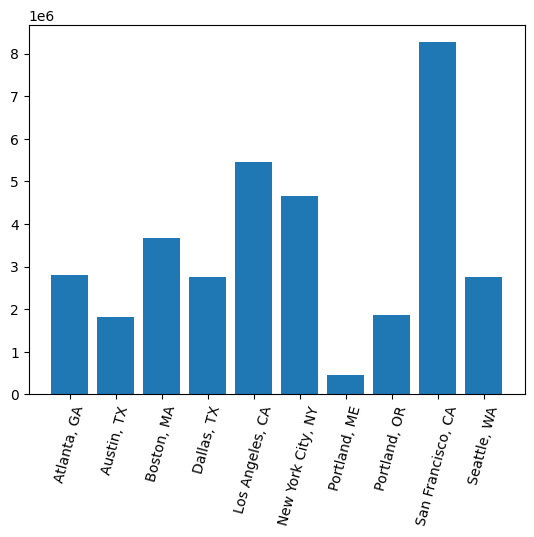

In [22]:
cities = [city for city, df1 in df.groupby('City')]

plt.bar(cities, cities_sales)

plt.xticks(cities, rotation=75)
plt.show()

#### What time should we display ads to maximize likelihood of customer's buying product?

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,209921,USB-C Charging Cable,1,11.950000,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95,"Portland, ME"
1,209922,Macbook Pro Laptop,1,1700.000000,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00,"San Francisco, CA"
2,209923,ThinkPad Laptop,1,999.989990,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99,"Los Angeles, CA"
3,209924,27in FHD Monitor,1,149.990005,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99,"Seattle, WA"
4,209925,Bose SoundSport Headphones,1,99.989998,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99,"San Francisco, CA"


In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

/var/folders/6m/znjmq411417c4s_2l2f24tym0000gn/T/ipykernel_48530/3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,209921,USB-C Charging Cable,1,11.950000,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,"Portland, ME"
1,209922,Macbook Pro Laptop,1,1700.000000,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,"San Francisco, CA"
2,209923,ThinkPad Laptop,1,999.989990,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,"Los Angeles, CA"
3,209924,27in FHD Monitor,1,149.990005,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,"Seattle, WA"
4,209925,Bose SoundSport Headphones,1,99.989998,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,"San Francisco, CA"


In [33]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,209921,USB-C Charging Cable,1,11.950000,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,"Portland, ME",19,34
1,209922,Macbook Pro Laptop,1,1700.000000,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,"San Francisco, CA",10,5
2,209923,ThinkPad Laptop,1,999.989990,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,"Los Angeles, CA",20,18
3,209924,27in FHD Monitor,1,149.990005,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,"Seattle, WA",10,21
4,209925,Bose SoundSport Headphones,1,99.989998,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,"San Francisco, CA",18,58


In [37]:
results = df.groupby('Hour')['Sales'].count()
results

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

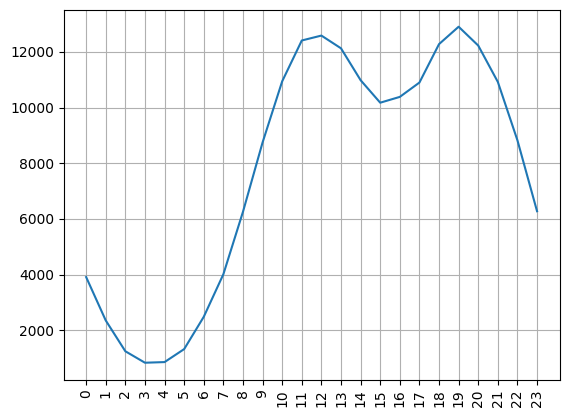

In [40]:
hours = range(0,24)

plt.plot(hours, results)
plt.grid()
plt.xticks(hours, rotation=90)
plt.show()

#### What product are most often sold together

In [41]:
temp_df = df[df['Order ID'].duplicated(keep=False)]
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
17,209938,iPhone,1,700.00,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,700.00,"Seattle, WA",12,29
18,209938,Wired Headphones,1,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,11.99,"Seattle, WA",12,29
29,209949,Google Phone,1,600.00,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,600.00,"San Francisco, CA",7,45
30,209949,USB-C Charging Cable,1,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,11.95,"San Francisco, CA",7,45
41,209960,USB-C Charging Cable,1,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001",6,11.95,"Dallas, TX",11,53


In [44]:
temp_df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
temp_df = temp_df[['Order ID', 'Grouped']].drop_duplicates()
temp_df

/var/folders/6m/znjmq411417c4s_2l2f24tym0000gn/T/ipykernel_48530/3769999773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
17,209938,"iPhone, Wired Headphones"
29,209949,"Google Phone, USB-C Charging Cable"
41,209960,"USB-C Charging Cable, AA Batteries (4-pack)"
43,209961,"iPhone, Lightning Charging Cable"
147,210064,"Lightning Charging Cable, 27in FHD Monitor"
...,...,...
186710,319536,"Macbook Pro Laptop, Wired Headphones"
186731,319556,"Google Phone, Wired Headphones"
186760,319584,"iPhone, Wired Headphones"
186773,319596,"iPhone, Lightning Charging Cable"


In [49]:
from itertools import combinations
from collections import Counter

In [96]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for pandas>=1.2 from https://files.pythonhosted.org/packages/db/7c/9a60add21b96140e22465d9adf09832feade45235cd22f4cb1668a25e443/pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/

In [83]:
count = Counter()

for row in temp_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


#### What product sold the most?

In [102]:
result = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

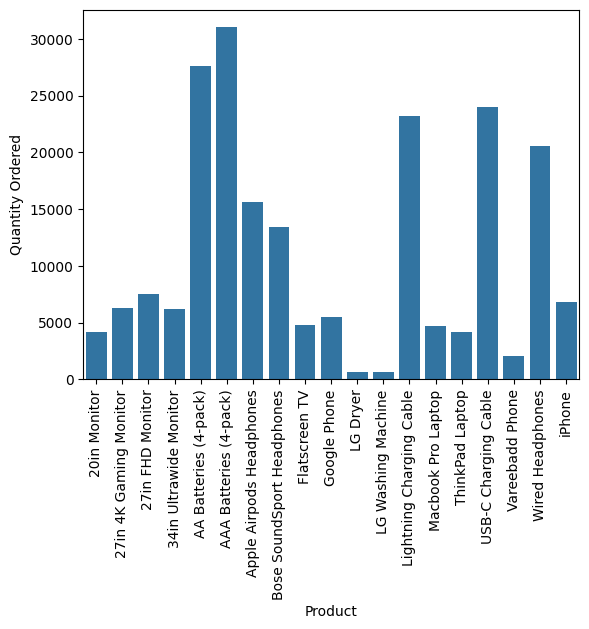

In [110]:
sns.barplot(x='Product', y='Quantity Ordered', data=result)

plt.xticks(rotation=90) 
plt.show()

In [115]:
prices = df.groupby('Product')['Price Each'].mean().astype('int32').reset_index()
prices

,Product,Price Each
0,20in Monitor,109
1,27in 4K Gaming Monitor,389
2,27in FHD Monitor,149
3,34in Ultrawide Monitor,379
4,AA Batteries (4-pack),3
5,AAA Batteries (4-pack),2
6,Apple Airpods Headphones,150
7,Bose SoundSport Headphones,99
8,Flatscreen TV,300
9,Google Phone,600


/var/folders/6m/znjmq411417c4s_2l2f24tym0000gn/T/ipykernel_48530/2845804484.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


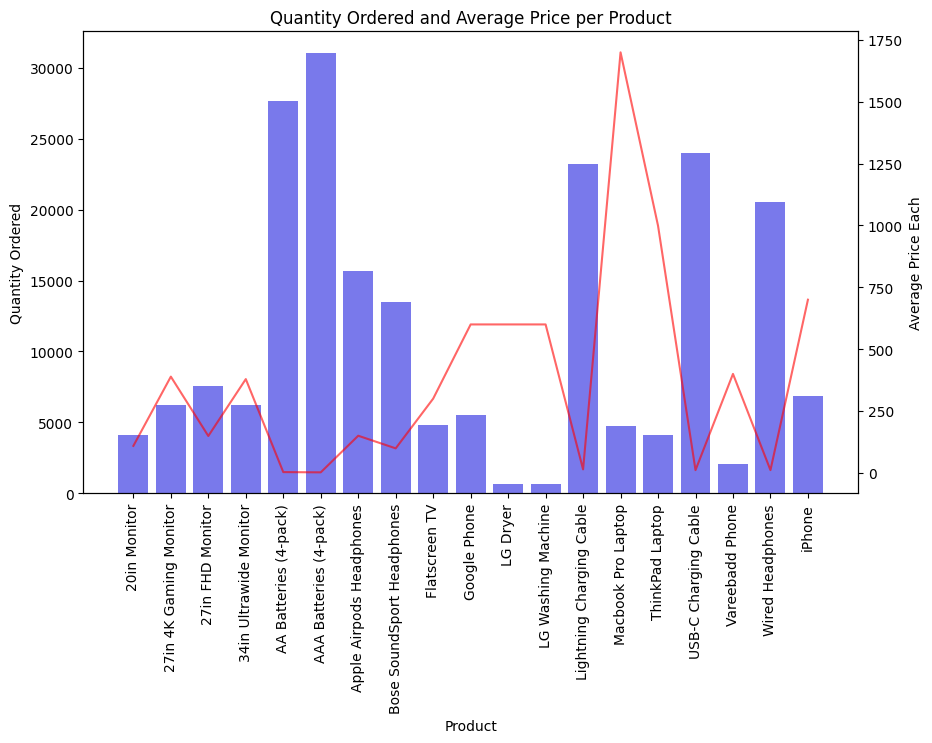

In [121]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the Quantity Ordered as barplot on primary y-axis
sns.barplot(x='Product', y='Quantity Ordered', data=result, ax=ax1, color='b', alpha=0.6)

# Set labels and title for primary y-axis
ax1.set_ylabel('Quantity Ordered')
ax1.set_xlabel('Product')
ax1.set_title('Quantity Ordered and Average Price per Product')

# Create a secondary y-axis to overlay the prices
ax2 = ax1.twinx()

# Plot the Price Each as barplot on secondary y-axis
sns.lineplot(x='Product', y='Price Each', data=prices, ax=ax2, color='r', alpha=0.6)

# Set label for secondary y-axis
ax2.set_ylabel('Average Price Each')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Display the plot
plt.show()